In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords 
import string
import collections

import seaborn as sns
#from wordcloud import WordCloud #I have issues with wordcloud

import re
#import spacy #I have issues with spacy

In [52]:
raw_data = pd.read_csv("all_reviews.csv")
raw_data.head()

,Airline,Review ID,Date Published,Overall Rating,Passenger Country,Trip Verified,Review Title,Review,Aircraft,Type Of Traveller,...,Layover,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Inflight Entertainment
0,scoot,891669,2024-03-26,3.0,Australia,Not Verified,"""not recommend flying Scoot""",My flight to Singapore was uneventful as usual...,Boeing 787,Solo Leisure,...,NaN,February 2024,1.0,3.0,1.0,3.0,2.0,3.0,no,NaN
1,scoot,891535,2024-03-24,1.0,Malaysia,Trip Verified,"""whole cabin is like sauna""",Using super old plane. Aircon was blowing warm...,NaN,Solo Leisure,...,NaN,March 2024,1.0,3.0,2.0,3.0,NaN,2.0,no,1.0
2,scoot,891527,2024-03-24,9.0,Singapore,Trip Verified,"""professional, helpful and friendly""","I travelled with my sister, my elderly parent ...",NaN,Family Leisure,...,NaN,March 2024,4.0,5.0,4.0,5.0,NaN,5.0,yes,NaN
3,scoot,891411,2024-03-22,7.0,United States,Trip Verified,"""seat pitch is generous and comfortable""",Was assigned last two row at seat 39F with the...,A321 NEO,Solo Leisure,...,NaN,March 2024,5.0,3.0,NaN,2.0,2.0,5.0,yes,NaN
4,scoot,891340,2024-03-21,4.0,Australia,Trip Verified,"""Very rude male flight attendant""",Very rude male flight attendant. Accessed the ...,A321,Family Leisure,...,NaN,March 2024,3.0,1.0,NaN,4.0,NaN,4.0,no,NaN


In [53]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline                 4117 non-null   object 
 1   Review ID               4117 non-null   int64  
 2   Date Published          4117 non-null   object 
 3   Overall Rating          3986 non-null   float64
 4   Passenger Country       4102 non-null   object 
 5   Trip Verified           2659 non-null   object 
 6   Review Title            4117 non-null   object 
 7   Review                  4117 non-null   object 
 8   Aircraft                1078 non-null   object 
 9   Type Of Traveller       2993 non-null   object 
 10  Seat Type               3978 non-null   object 
 11  Origin                  2973 non-null   object 
 12  Destination             2973 non-null   object 
 13  Layover                 421 non-null    object 
 14  Date Flown              2988 non-null   

In [54]:
def single_column_analysis(data, col, title, horizontal, show_count, top_10):
    unique_counts = data[col].value_counts().sort_values(ascending = True)
    if top_10:
        unique_counts = unique_counts.tail(10)
    if show_count:
        print(unique_counts)
    if horizontal:
        plt.barh(unique_counts.index, unique_counts.values)
    else:
        plt.bar(unique_counts.index, unique_counts.values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of Each {title}')
    plt.show()  

Airline
zipair               71
lion-air            211
cebu-pacific        407
indigo-airlines     494
scoot               683
airasia             952
jetstar-airways    1299
Name: count, dtype: int64


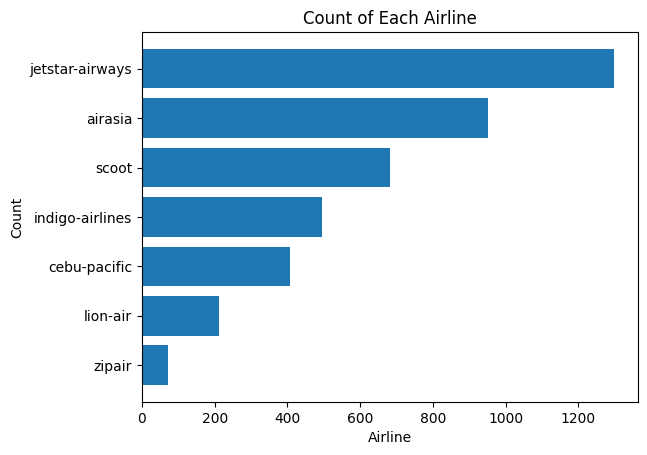

In [55]:
# Check Airlines
single_column_analysis(raw_data, "Airline", "Airline", 1, 1, 0)

Overall Rating
4.0      127
6.0      144
5.0      154
3.0      241
7.0      294
10.0     342
9.0      351
8.0      376
2.0      407
1.0     1550
Name: count, dtype: int64


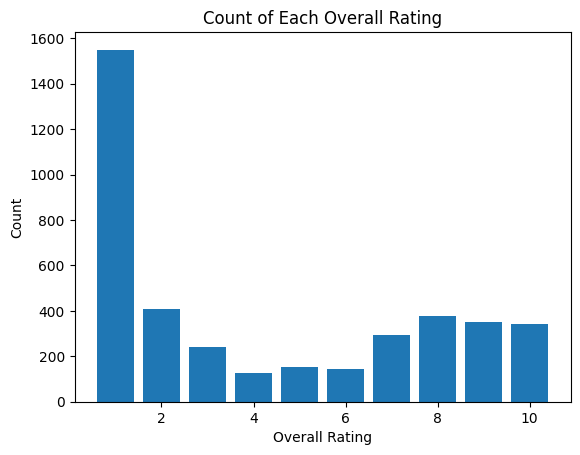

In [56]:
# Check ratings
single_column_analysis(raw_data, "Overall Rating", "Overall Rating", 0, 1, 0)

Trip Verified
» World's Best Low-Cost Airline       1
Unverified                            3
Verified Review                     400
Not Verified                        494
Trip Verified                      1761
Name: count, dtype: int64


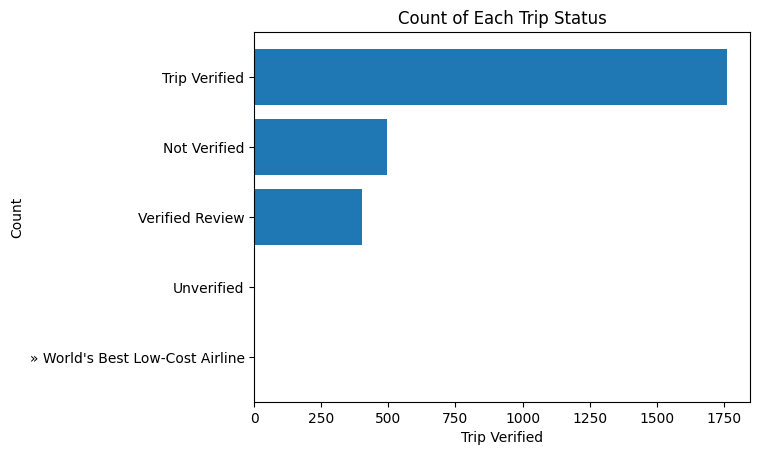

In [57]:
# Trip verified
single_column_analysis(raw_data, "Trip Verified", "Trip Status", 1, 1, 0)

Seat Comfort
0.0      27
5.0     324
2.0     584
4.0     718
3.0     840
1.0    1161
Name: count, dtype: int64


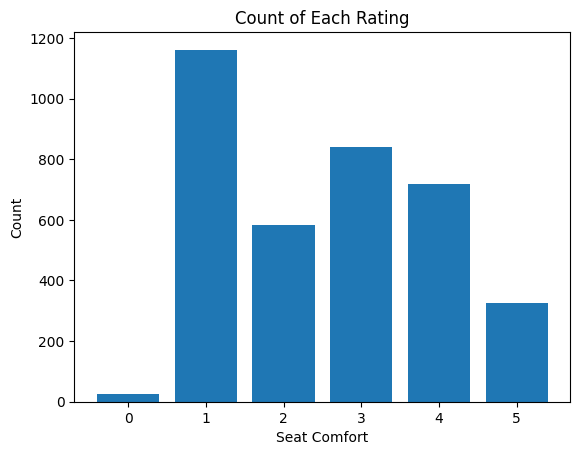

Cabin Staff Service
0.0      16
2.0     495
3.0     670
5.0     693
4.0     714
1.0    1041
Name: count, dtype: int64


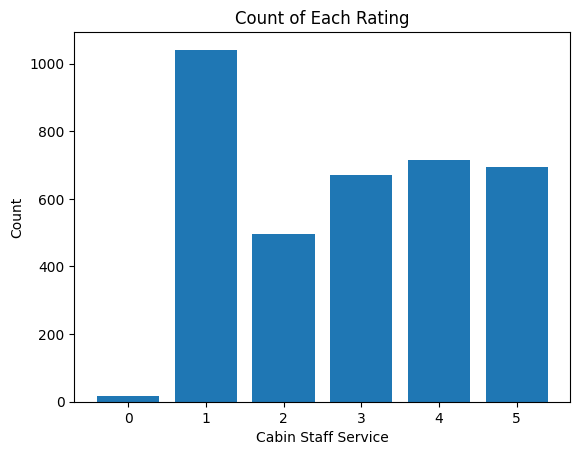

Food & Beverages
5.0    175
0.0    242
2.0    294
4.0    393
3.0    408
1.0    939
Name: count, dtype: int64


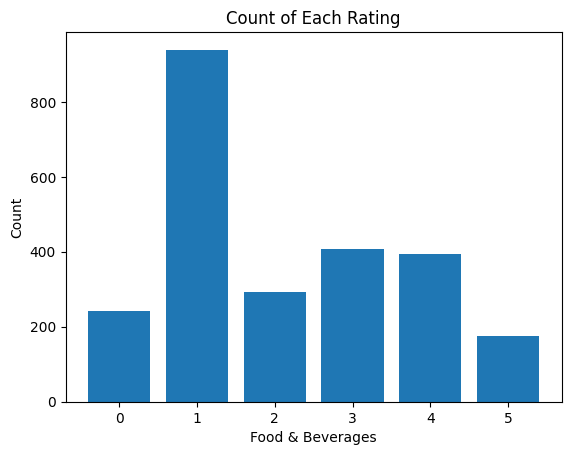

Ground Service
2.0     291
3.0     306
4.0     381
5.0     383
1.0    1460
Name: count, dtype: int64


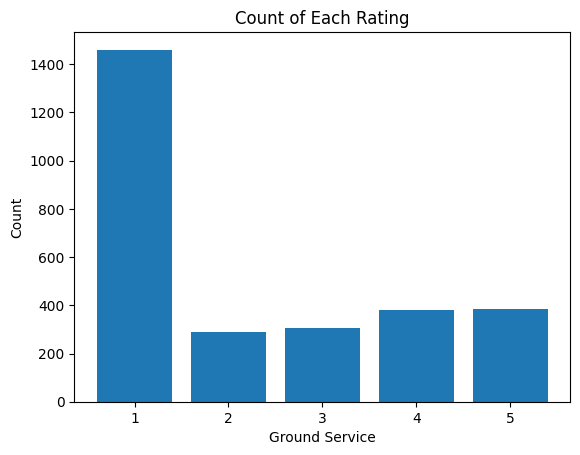

Wifi & Connectivity
0.0      1
5.0     25
4.0     27
2.0     38
3.0     39
1.0    513
Name: count, dtype: int64


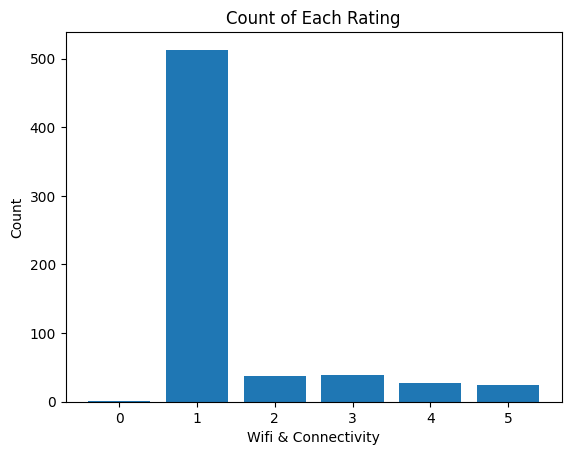

Value For Money
0.0      15
3.0     453
2.0     512
4.0     651
5.0     879
1.0    1594
Name: count, dtype: int64


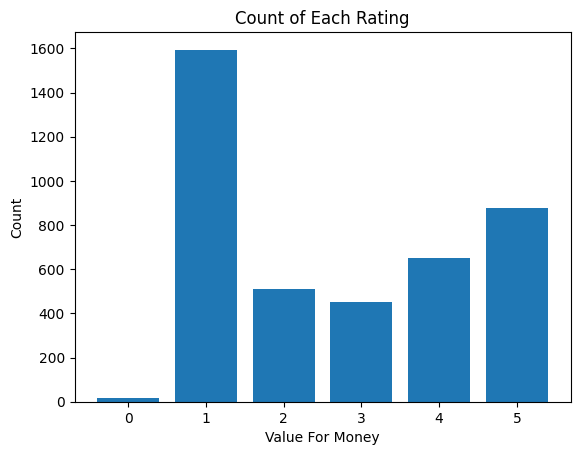

Inflight Entertainment
5.0     55
4.0     95
2.0    127
3.0    161
0.0    444
1.0    917
Name: count, dtype: int64


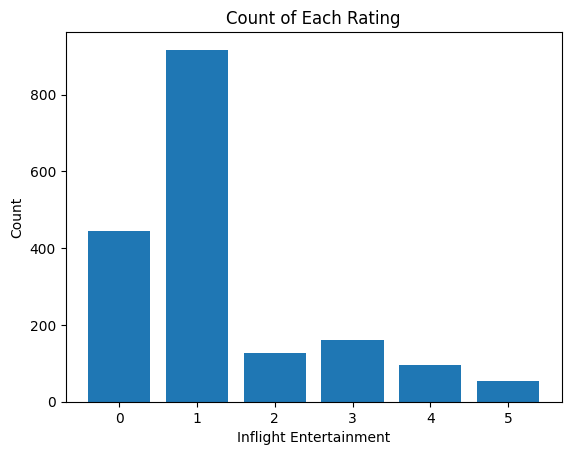

In [58]:
#Other reviews
#Note sum of count are different because some rows do not have the review
lst = ["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Wifi & Connectivity", "Value For Money", "Inflight Entertainment"]
for col in lst:
    single_column_analysis(raw_data, col, "Rating", 0, 1, 0)

Recommended
yes    1563
no     2554
Name: count, dtype: int64


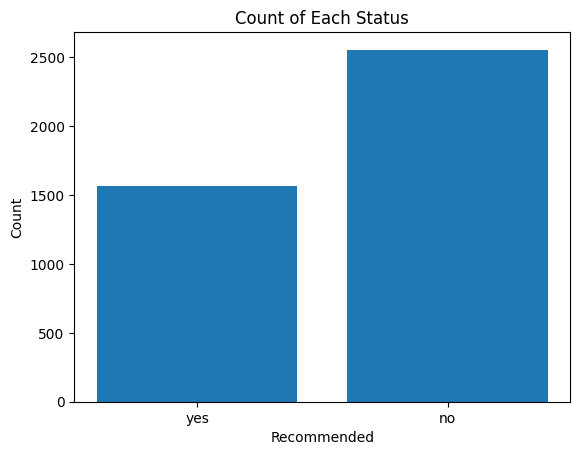

In [59]:
#Recommended
single_column_analysis(raw_data, "Recommended", "Status", 0, 1, 0)

Origin
Perth            54
Delhi            58
Denpasar         59
Jakarta          67
Bangkok          90
Kuala Lumpur    134
Manila          140
Melbourne       182
Sydney          219
Singapore       255
Name: count, dtype: int64


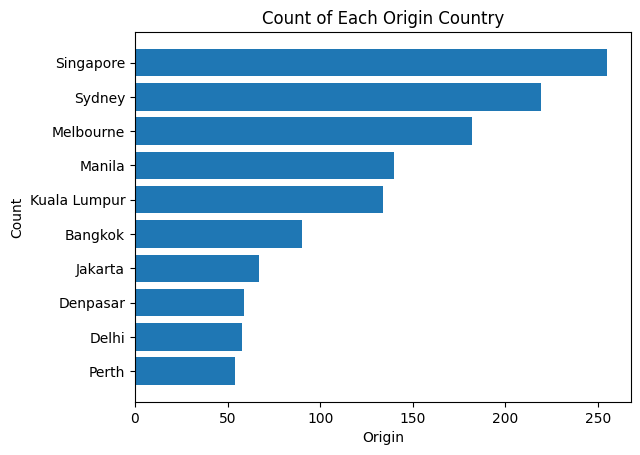

In [60]:
#Origin
single_column_analysis(raw_data, "Origin", "Origin Country", 1, 1, 1)

Destination
Mumbai           56
Denpasar         68
Jakarta          74
Bali             77
Bangkok          99
Manila          111
Kuala Lumpur    120
Melbourne       199
Singapore       208
Sydney          210
Name: count, dtype: int64


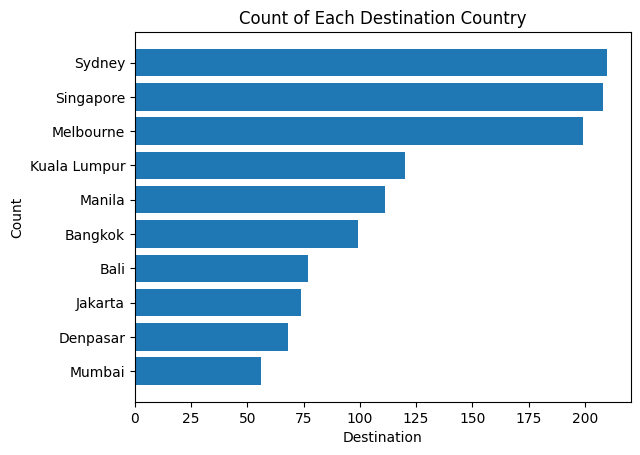

In [61]:
#Destination
single_column_analysis(raw_data, "Destination", "Destination Country", 1, 1, 1)

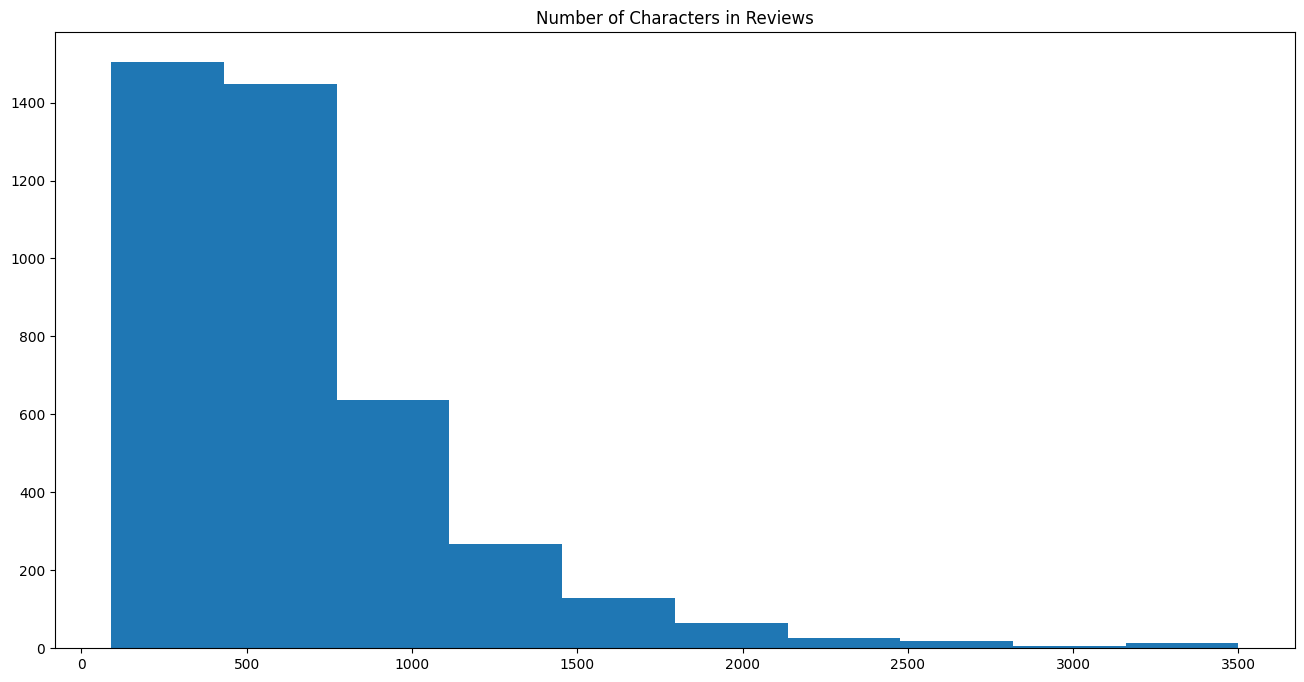

In [62]:
#Reviews
review_len = raw_data['Review'].str.len()

plt.figure(figsize=(16,8))
plt.hist(review_len)
plt.title('Number of Characters in Reviews')

plt.show()

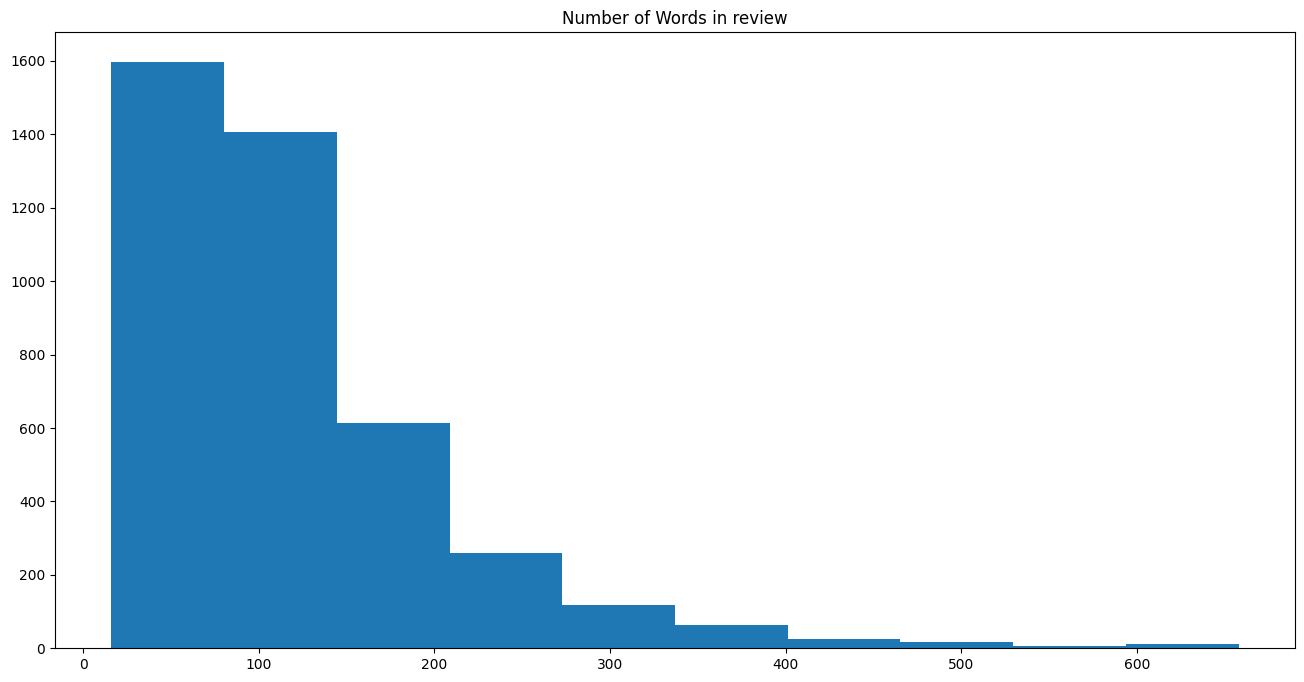

In [63]:
review_words = raw_data['Review'].str.split().map(lambda text: len(text))

plt.figure(figsize=(16,8))
plt.hist(review_words)
plt.title('Number of Words in review')

plt.show()

In [64]:
#Analyse reviews
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(["would", "get", "-"])
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [65]:
def create_corpus(column,df):
    corpus = []
    
    for sentence in df[column].str.split():
        for word in sentence:
            corpus.append(word.lower())
    
    return corpus

<BarContainer object of 20 artists>

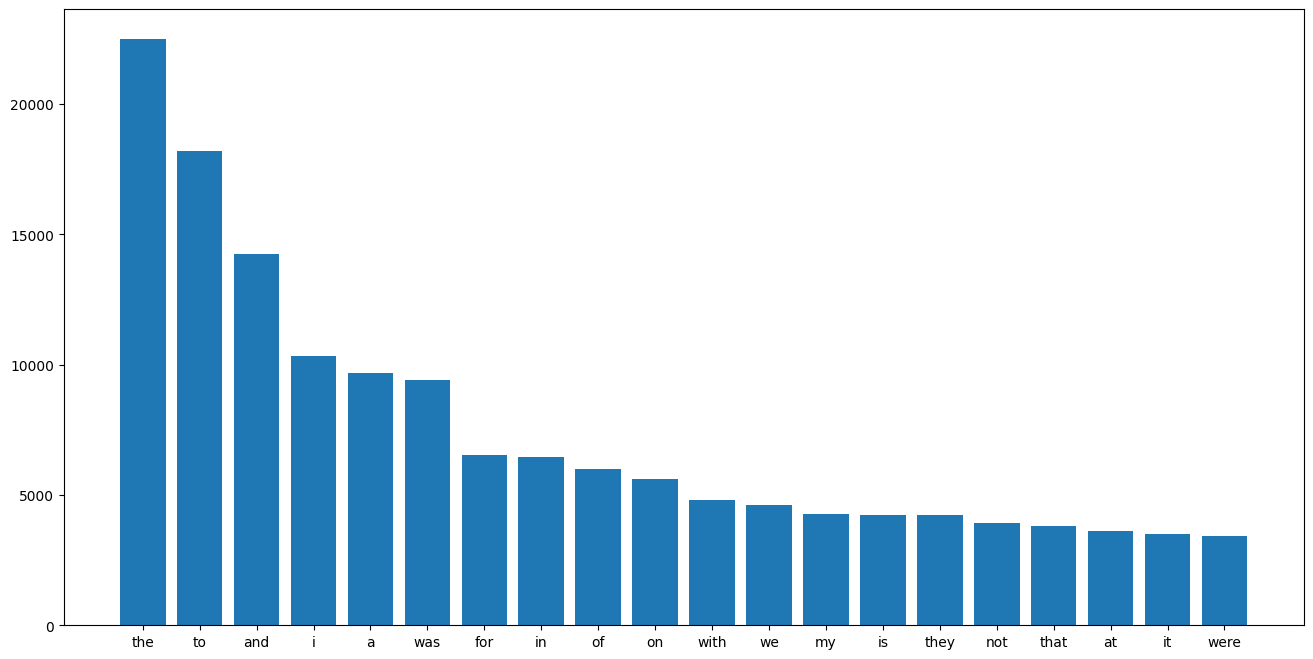

In [66]:
#Top 20 most common stopwords
corpus = create_corpus("Review", raw_data)
dic = collections.defaultdict(int)

for word in corpus:
    if word in STOPWORDS:
        dic[word] += 1

x, y = zip(*sorted(dic.items(), key=lambda word: word[1], reverse=True)[:20])

plt.figure(figsize=(16, 8))
plt.bar(x, y)

<BarContainer object of 20 artists>

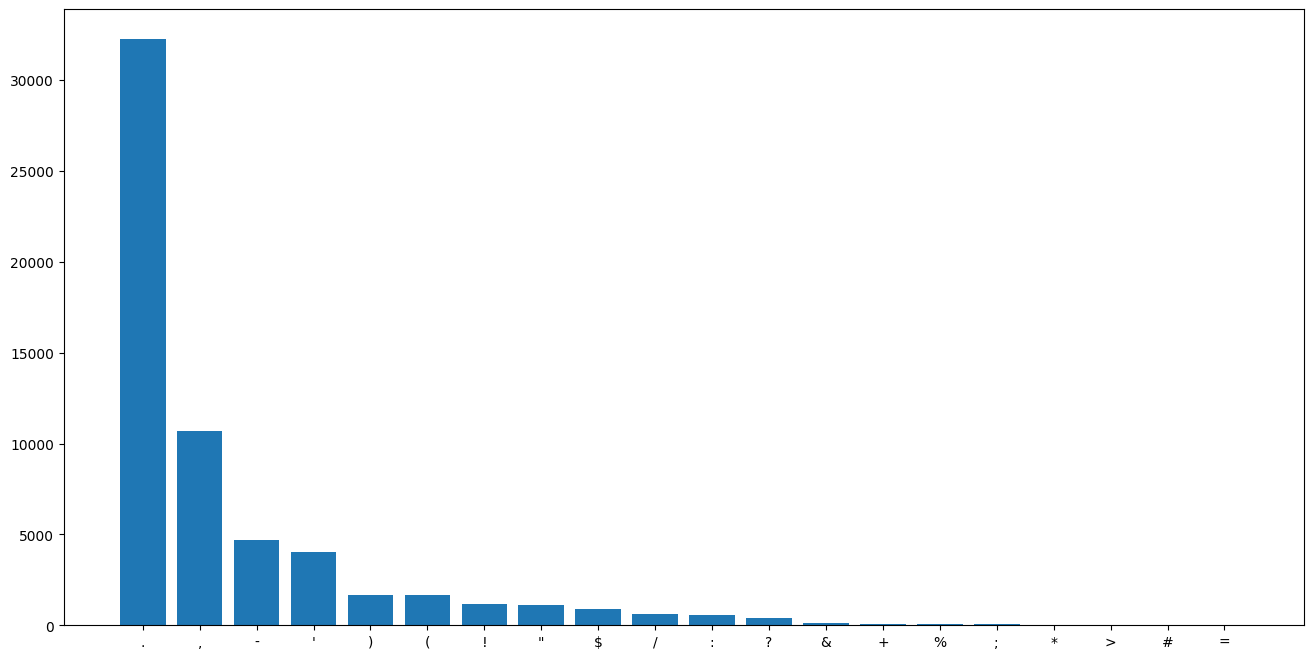

In [67]:
#Top 20 punctuations
corpus = create_corpus("Review", raw_data)
dic = collections.defaultdict(int)

for word in corpus:
    for char in word:
        if char in string.punctuation:
            dic[char] += 1

x, y = zip(*sorted(dic.items(), key=lambda word: word[1], reverse=True)[:20])

plt.figure(figsize=(16,8))
plt.bar(x, y)

c:\Python39\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<AxesSubplot:>

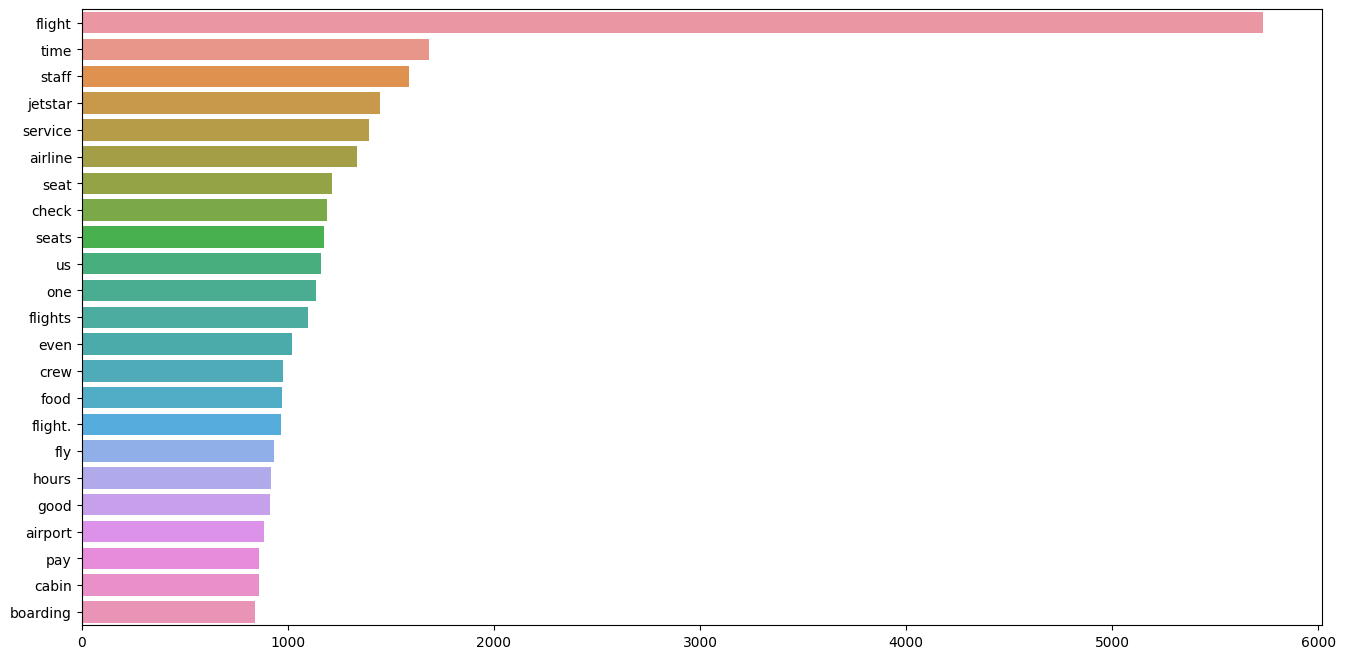

In [68]:
#Find most popular words not in STOPWORDS
corpus = create_corpus("Review", raw_data)
counter = collections.Counter(corpus)
most_common = counter.most_common()

x, y = [], []

for word, count in most_common[:80]:
    if word not in STOPWORDS:
        y.append(word)
        x.append(count)
        
plt.figure(figsize=(16, 8))
sns.barplot(x=x, y=y)

In [69]:
#TODO: Apply wordcloud

# all_words = ' '.join(create_corpus("Review", raw_data))

# wordcloud = WordCloud(max_font_size=50, background_color='white', stopwords=STOPWORDS).generate(all_words)

# plt.figure(figsize=(15,5))
# plt.imshow(wordcloud, interpolation='bilinear')

# plt.show()

In [70]:
#Preprocess texts
# Steps:
# 1) Apply lowercase
# 2) Remove punctuation
# 3) Remove numbers
# 4) Remove stopwords
# 5) Remove white spaces
# 6) Apply lemmatization

# 1) Apply lowercase
raw_data['review_cleaned'] = raw_data['Review'].apply(lambda text: text.lower())

# 2) Remove punctuations
def remove_punctuation(sentence):
    return ''.join([word for word in str(sentence) if word not in string.punctuation])

raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_punctuation(text))

# 3) Remove numbers
def remove_numbers(sentence):
    return re.sub(r'\d+', '', sentence)

raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_numbers(text))

# 4) Remove stopwords
def remove_stopwords(sentence):
    return ' '.join([word for word in str(sentence).split() if word not in STOPWORDS])
    
raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_stopwords(text))

# 5) Remove white spaces
def remove_spaces(sentence):
    return re.sub(r'\s+', ' ', sentence).strip()

raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: remove_spaces(text))

# TODO: Apply lemmatization
# 6) Apply lemmatization
# nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# def lemmatizer_doc(sentence):
#     doc = nlp(sentence)
#     new_sentence = [token.lemma_ for token in doc if token.is_alpha]
    
#     return ' '.join(new_sentence)

# raw_data['review_cleaned'] = raw_data['review_cleaned'].apply(lambda text: lemmatizer_doc(text))

In [71]:
print('Original review\n', raw_data['Review'].iloc[0])
print('\nReview clear\n', raw_data['review_cleaned'].iloc[0])

Original review
 My flight to Singapore was uneventful as usual except the aircraft cleanliness was bad. Upon arrival in Singapore, I found my suitcase badly dented and reported the damaged to Scoot's handling agent, SATS in Singapore. SATS will not handle the damage and directed me to to claim from Scoot Insurance Assessor online. That evening I dutifully submitted the claim with all supporting photos from SATS, boarding pass, etc. Response was prompt however unhelpful, it directed me to claim from my travel insurer which I refused. A reply from the Scoot's assessor requesting the same documents that were submitted in the online claim. Resend. Reply again requesting for same documents. Explained and objected. Reply and requesting for more photos! The whole process made my trip rather unpleasant! I decided to ignore that email. I was only claiming SGD 200 for the 2 year old damaged suitcase. I will definitely not recommend flying Scoot to friends!

Review clear
 flight singapore uneven

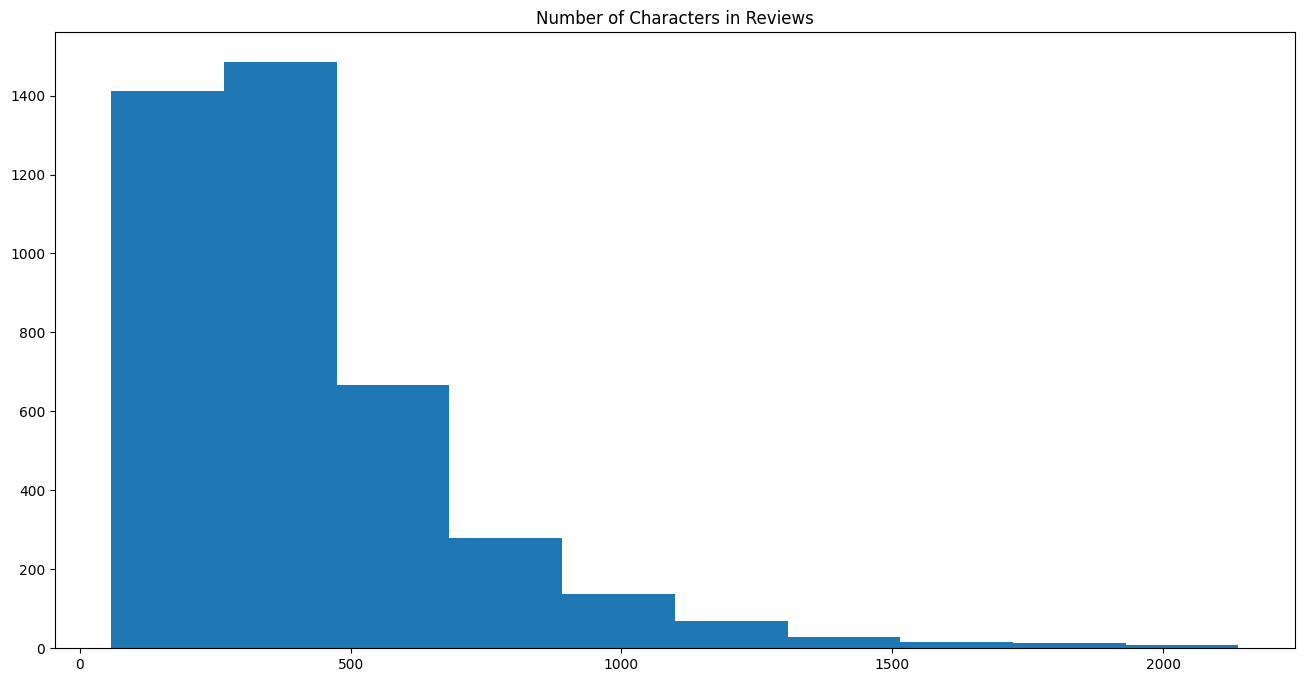

In [72]:
review_len = raw_data['review_cleaned'].str.len()

plt.figure(figsize=(16,8))
plt.hist(review_len)
plt.title('Number of Characters in Reviews')

plt.show()

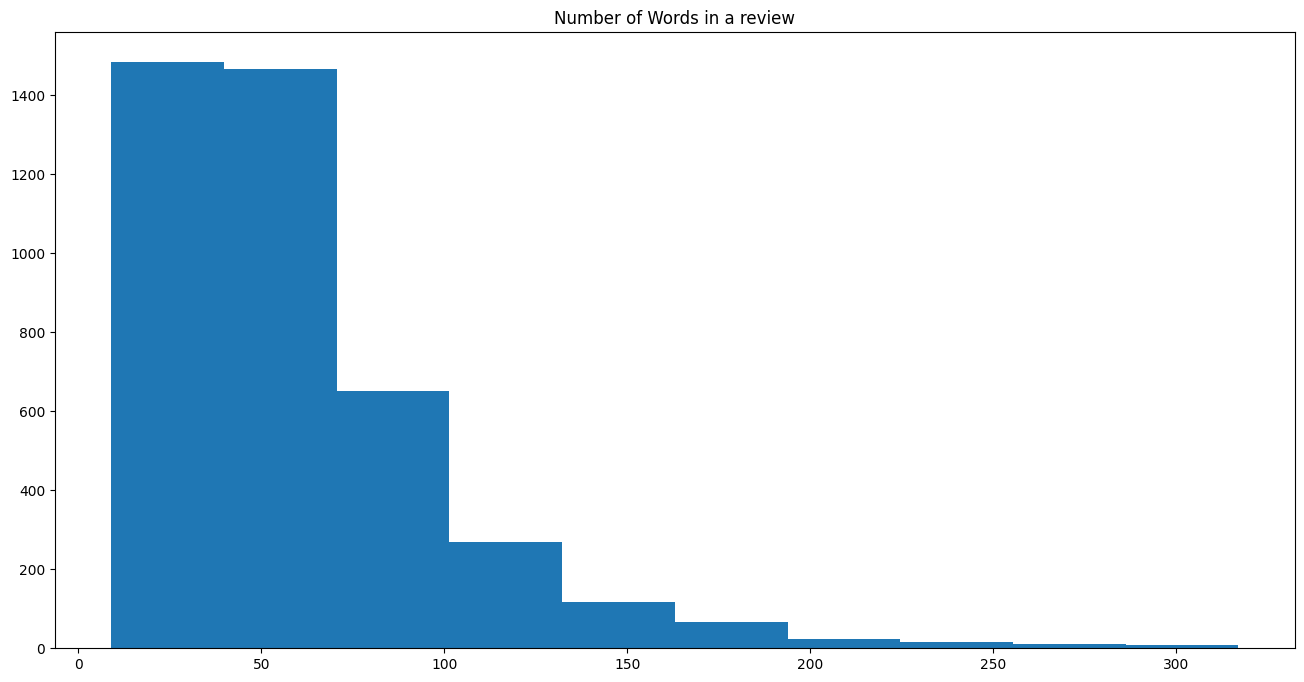

In [73]:
review_words = raw_data['review_cleaned'].str.split().map(lambda text: len(text))

plt.figure(figsize=(16,8))
plt.hist(review_words)
plt.title('Number of Words in a review')

plt.show()

<AxesSubplot:title={'center':'Most common words in cleaned reviews'}, xlabel='Count', ylabel='Word'>

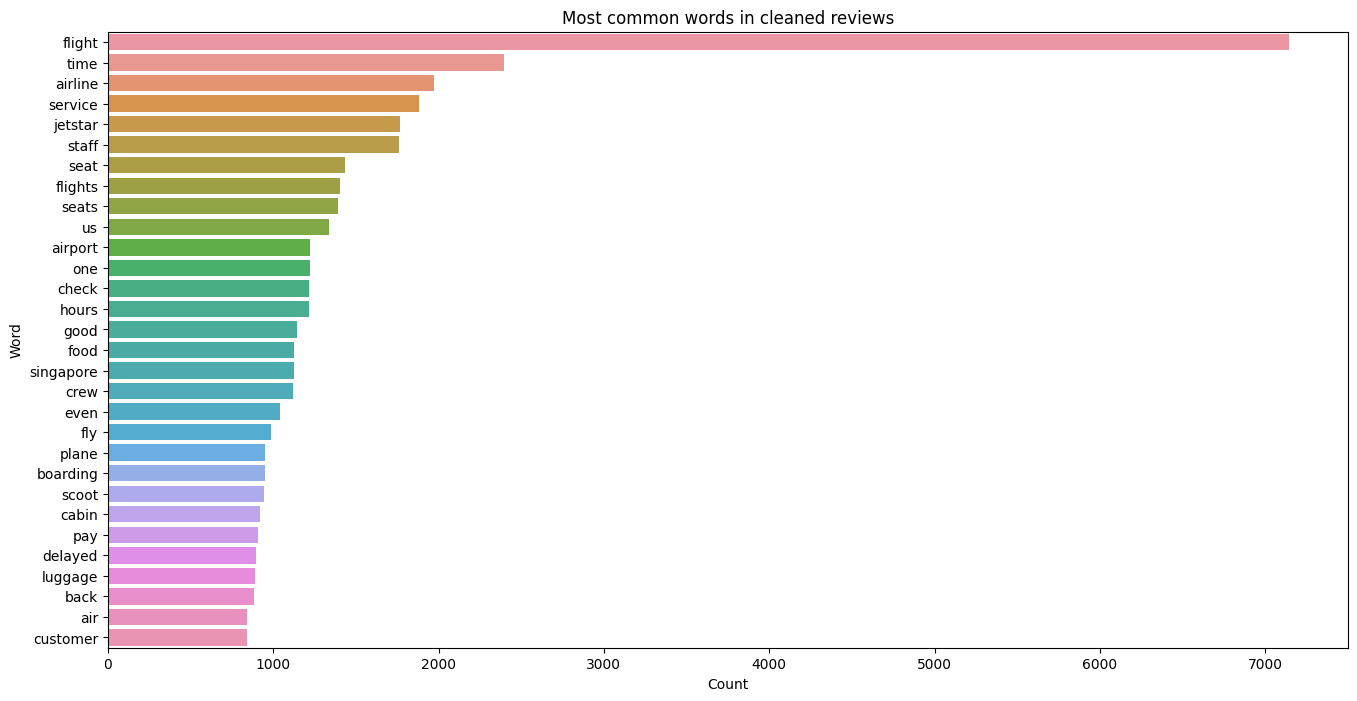

In [74]:
corpus = create_corpus("review_cleaned", raw_data)
counter = collections.Counter(corpus)
most_common = counter.most_common()

x, y = [], []

for word, count in most_common[:30]:
    if word not in STOPWORDS:
        y.append(word)
        x.append(count)
df = pd.DataFrame({'Count': x, 'Word': y})
plt.figure(figsize=(16, 8))
plt.title("Most common words in cleaned reviews")
sns.barplot(x='Count', y='Word', data = df)

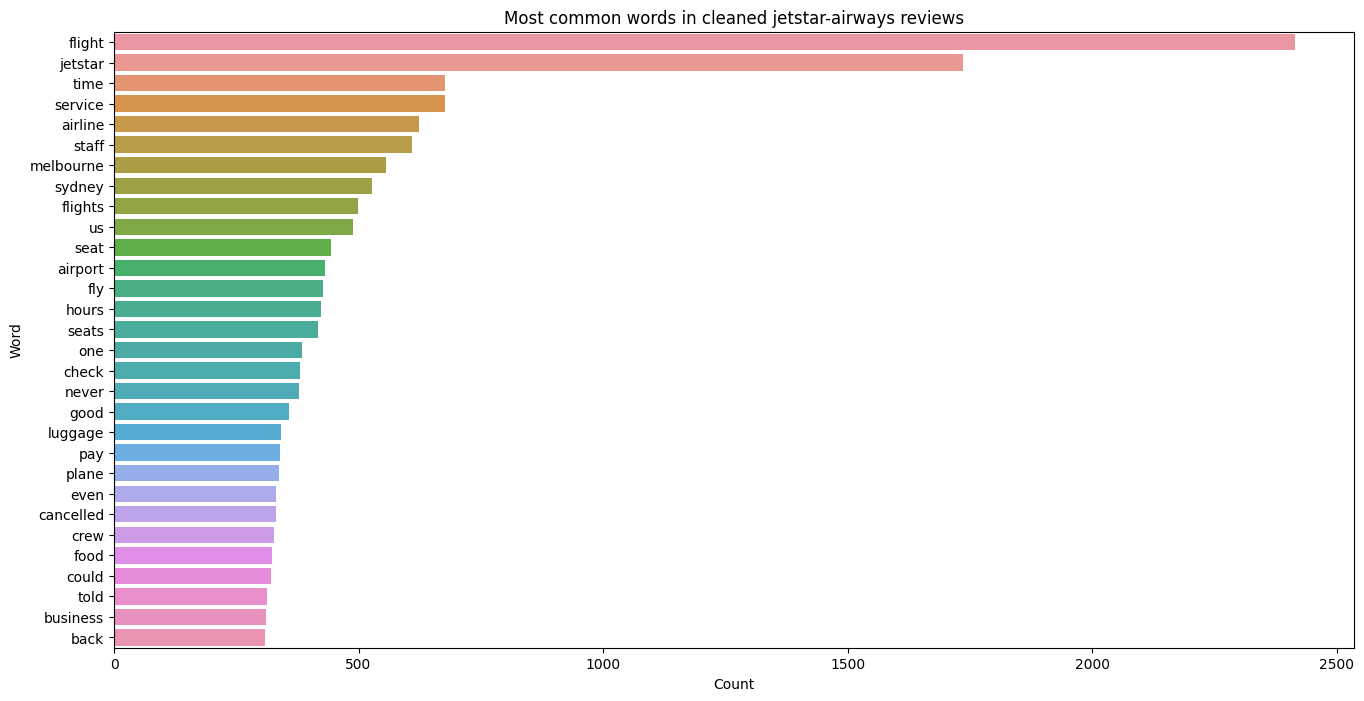

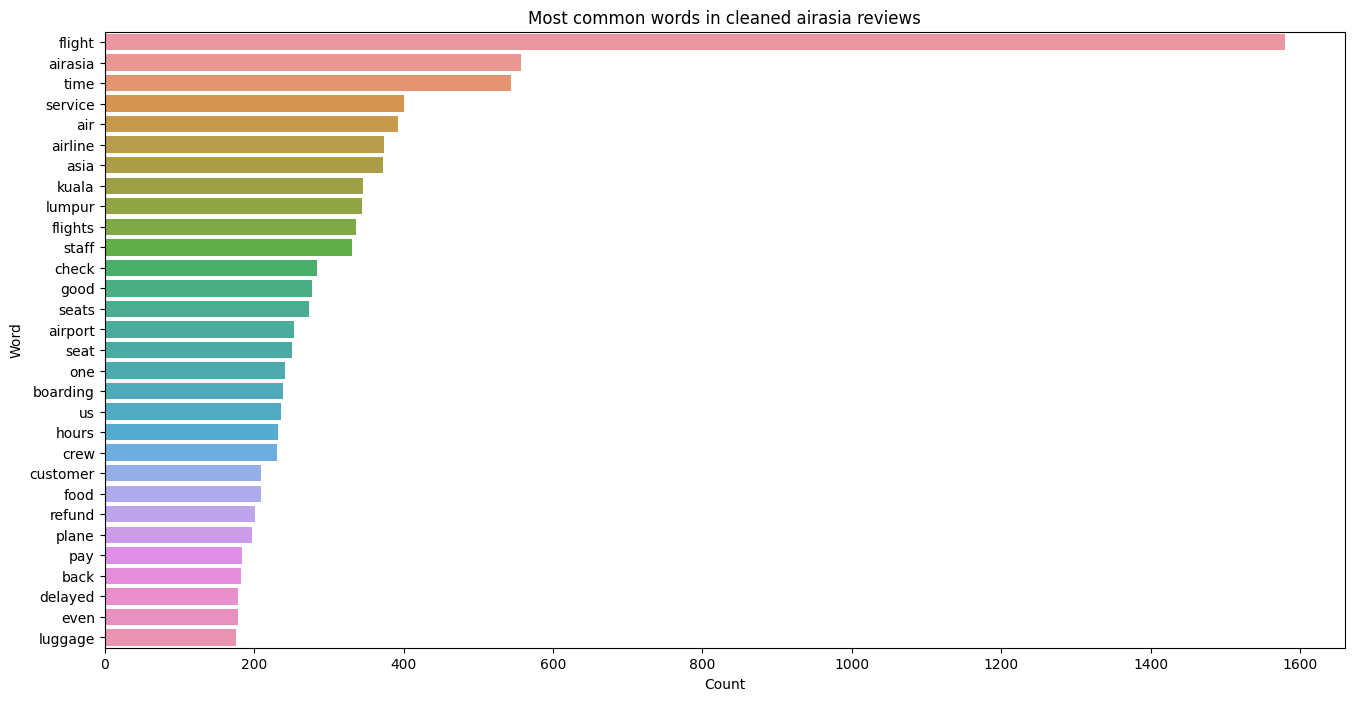

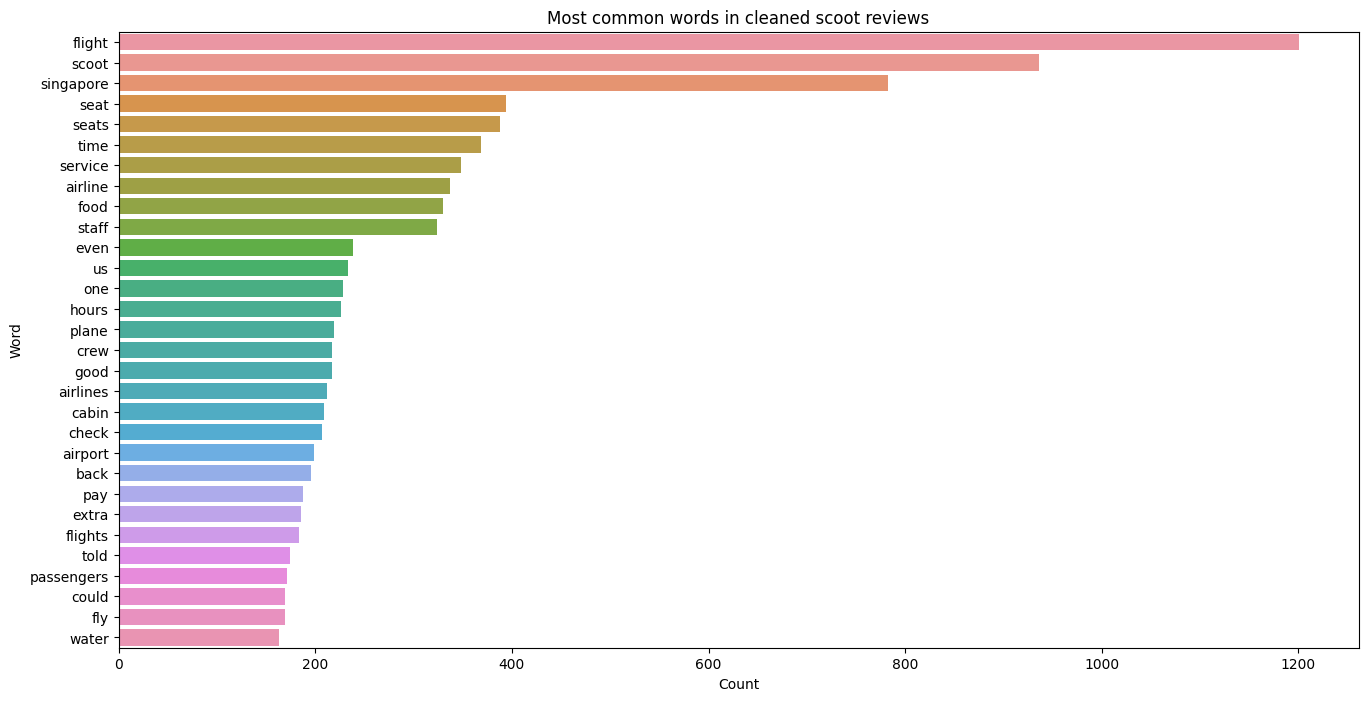

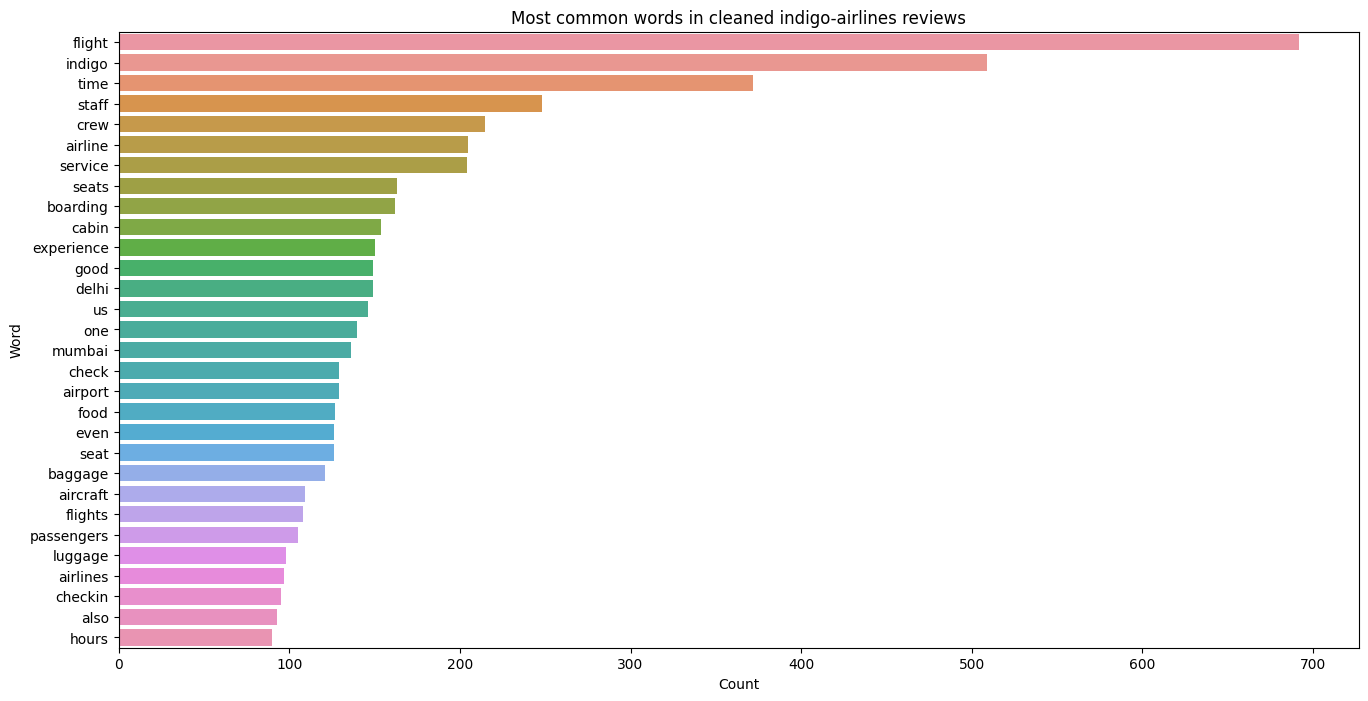

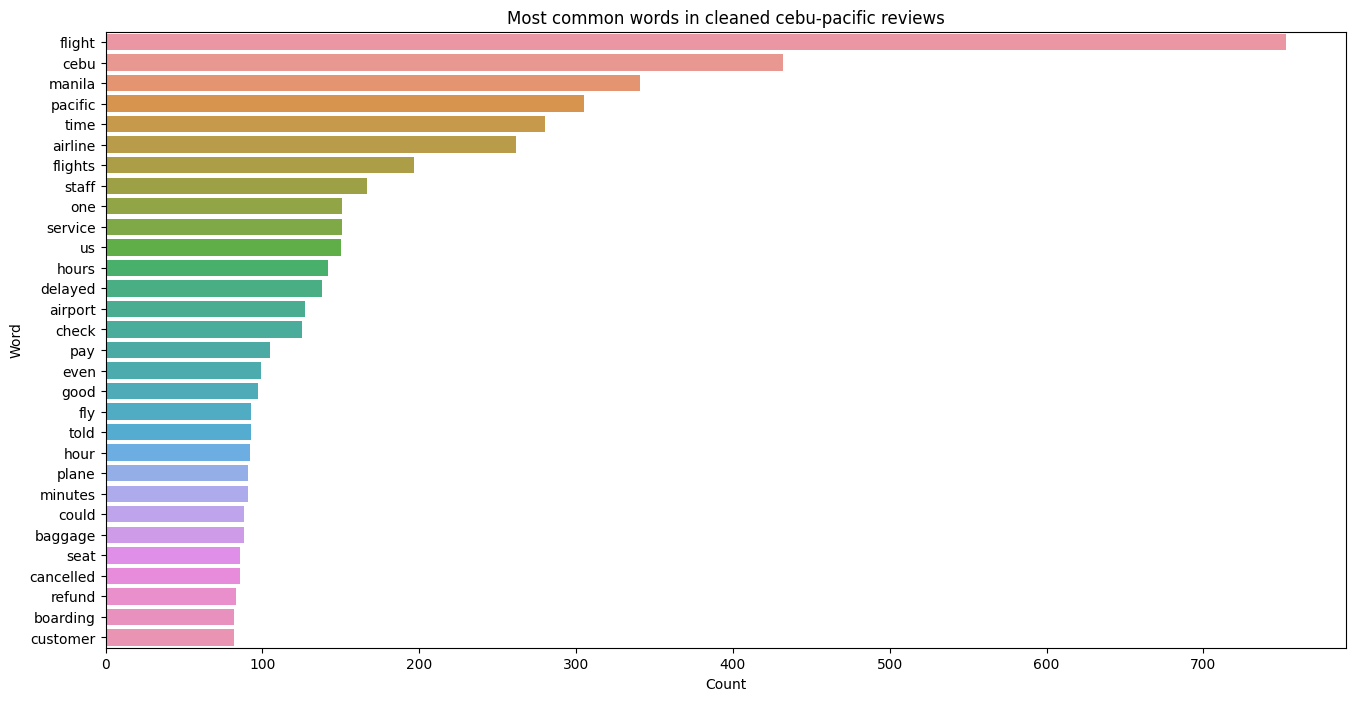

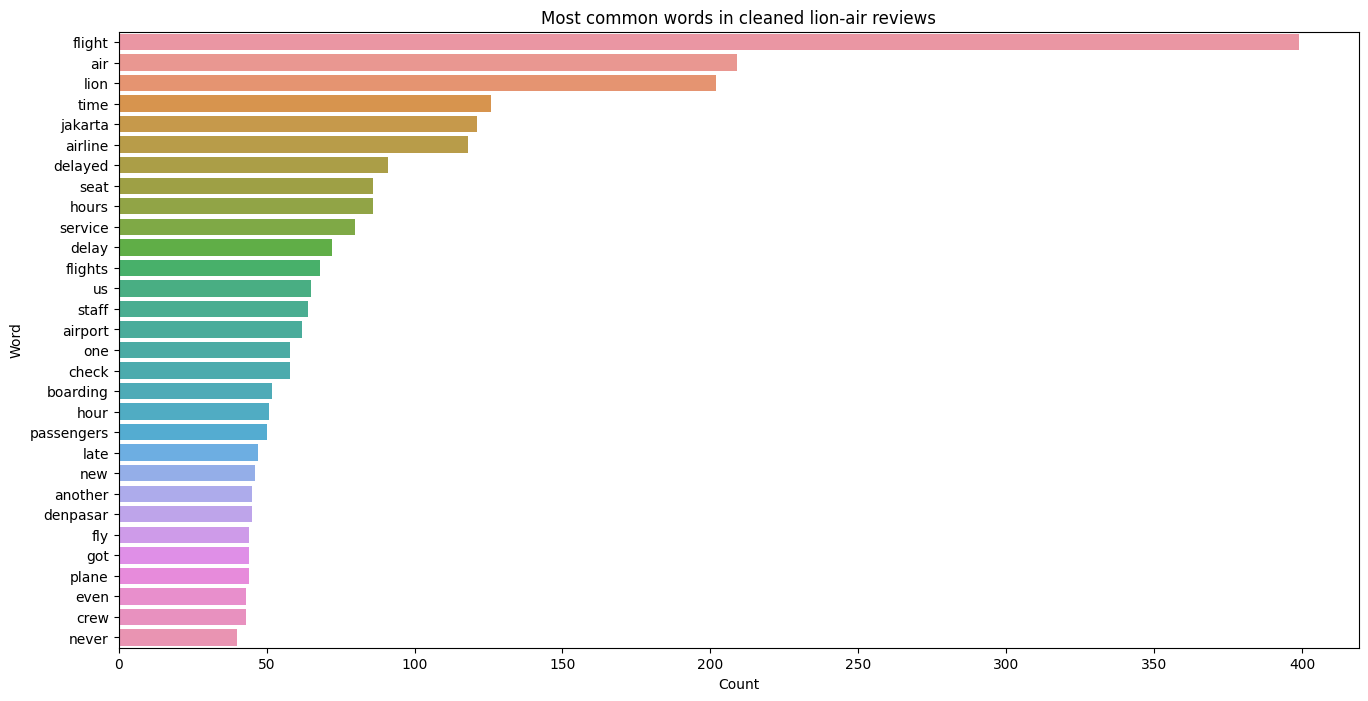

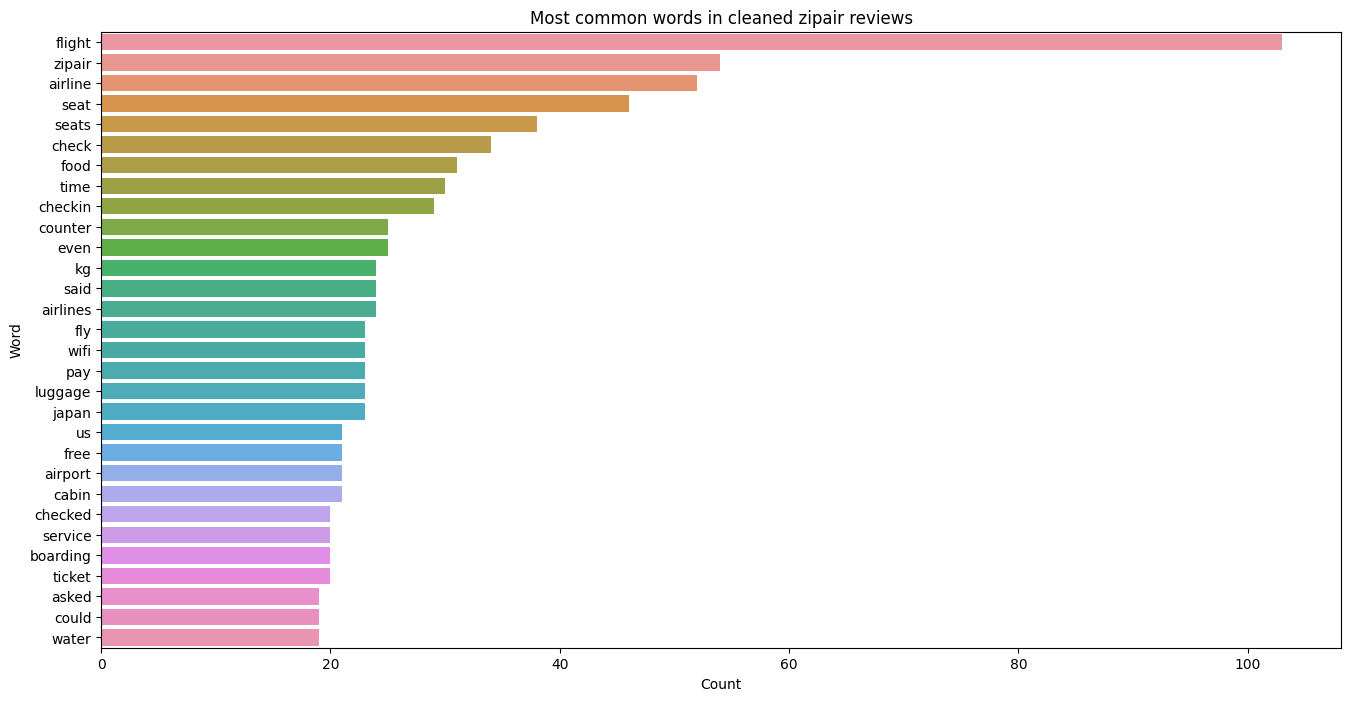

In [75]:
airline_lst = ["jetstar-airways","airasia","scoot","indigo-airlines","cebu-pacific","lion-air","zipair"]

for airline in airline_lst:
    corpus = create_corpus("review_cleaned", raw_data[raw_data["Airline"] == airline])
    counter = collections.Counter(corpus)
    most_common = counter.most_common()

    x, y = [], []

    for word, count in most_common[:30]:
        if word not in STOPWORDS:
            y.append(word)
            x.append(count)
    df = pd.DataFrame({'Count': x, 'Word': y})
    plt.figure(figsize=(16, 8))
    plt.title(f"Most common words in cleaned {airline} reviews")
    sns.barplot(x='Count', y='Word', data = df)

In [76]:
#TODO Wordclouds for each airline?

In [84]:
# Bivariate Analysis
grouped = raw_data[["Airline","Overall Rating","Seat Comfort","Cabin Staff Service","Food & Beverages","Ground Service","Wifi & Connectivity","Inflight Entertainment"]].groupby(['Airline']).mean().reset_index()
grouped

,Airline,Overall Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Inflight Entertainment
0,airasia,4.603191,2.720288,3.077576,2.491197,2.421502,1.500000,1.045340
1,cebu-pacific,3.796392,2.367284,2.792570,1.635000,2.067138,1.157895,1.081633
2,indigo-airlines,5.790984,3.054795,3.435780,2.675862,2.960526,1.600000,1.431138
3,jetstar-airways,3.523848,2.304384,2.570358,1.920143,1.871737,1.158416,1.504323
4,lion-air,3.375000,2.006369,2.206452,1.254545,1.953020,1.142857,1.024390
5,scoot,4.471299,2.691456,2.901274,1.973742,2.482105,1.755725,1.108696
6,zipair,3.577465,2.754098,2.819672,2.333333,2.253731,2.390244,1.709677


[('lion-air', 3.375), ('jetstar-airways', 3.5238480194017785), ('zipair', 3.5774647887323945), ('cebu-pacific', 3.7963917525773194), ('scoot', 4.471299093655589), ('airasia', 4.603191489361702), ('indigo-airlines', 5.790983606557377)]


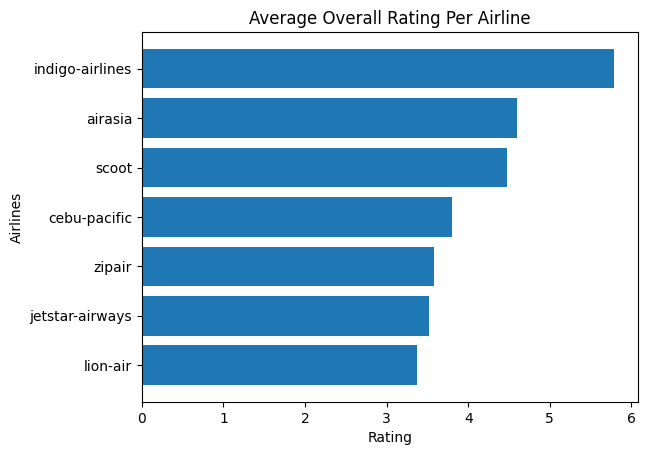

In [92]:
lst = []
for index, row in grouped.iterrows():
    lst.append((row["Airline"], row["Overall Rating"]))
lst.sort(key = lambda x: x[1])
print(lst)
plt.barh(list(map(lambda x: x[0], lst)), list(map(lambda x: x[1], lst)))
plt.xlabel("Rating")
plt.ylabel('Airlines')
plt.title("Average Overall Rating Per Airline")
plt.show()  

{'scoot': [3.0, 1.0, 9.0, 7.0, 4.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 10.0, 1.0, 1.0, 2.0, 7.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 7.0, 1.0, 1.0, 2.0, 8.0, 3.0, 1.0, 1.0, 1.0, 2.0, 9.0, 9.0, 9.0, 1.0, 9.0, 1.0, 1.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 8.0, 1.0, 2.0, 3.0, 1.0, 10.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 4.0, 1.0, 7.0, 1.0, 3.0, 1.0, 2.0, 4.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 6.0, 1.0, 1.0, 2.0, 1.0, 8.0, 8.0, 1.0, 1.0, 1.0, 2.0, 9.0, 1.0, 1.0, 6.0, 1.0, 1.0, 10.0, 2.0, 10.0, 2.0, 1.0, 1.0, 4.0, 2.0, 7.0, 1.0, 1.0, 1.0, 1.0, 8.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 8.0, 1.0, 1.0, 1.0, 3.0, 2.0, 5.0, 8.0, 5.0, 1.0, 2.0, 2.0, 6.0, 10.0, 1.0, 1.0, 1.0, 6.0, 4.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 5.0, 6.0, 10.0, 6.0, 1.0, 9.0, 1.0, 8.0, 9.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 5.0, 8.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 7.

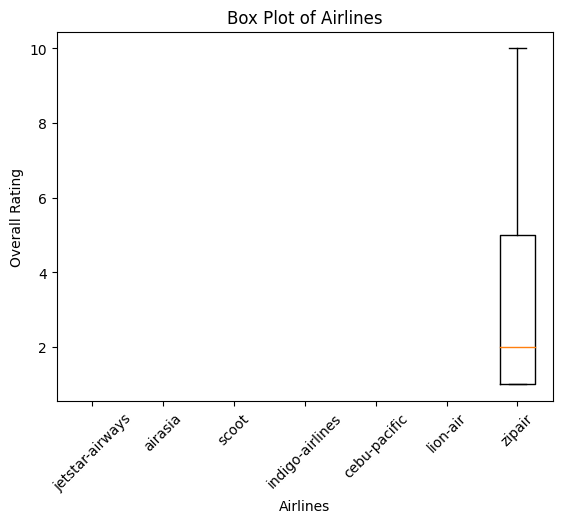

In [113]:
# Your airline list
airline_lst = ["jetstar-airways", "airasia", "scoot", "indigo-airlines", "cebu-pacific", "lion-air", "zipair"]

data = {}

for index, row in raw_data.iterrows():
    airline = row["Airline"]
    if airline in airline_lst:
        if airline not in data:
            data[airline] = []
        data[airline].append(row["Overall Rating"])

print(data)
# Create box plots for all airlines in the list
plt.boxplot([data.get(airline, []) for airline in airline_lst], labels=airline_lst)

# Adding labels and title
plt.xlabel('Airlines')
plt.ylabel('Overall Rating')
plt.title('Box Plot of Airlines')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

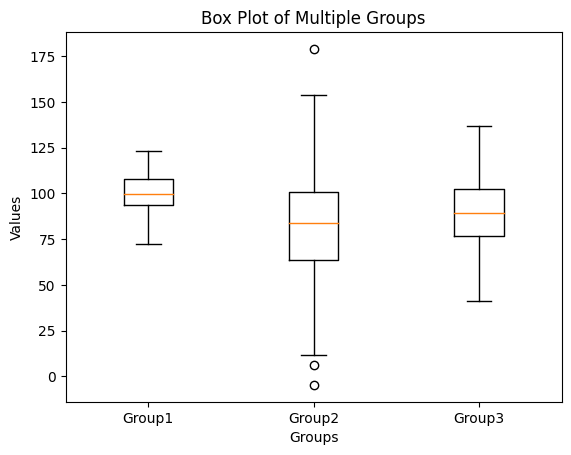

In [112]:
# Sample data
data = {
    'Group1': np.random.normal(100, 10, 100),
    'Group2': np.random.normal(80, 30, 100),
    'Group3': np.random.normal(90, 20, 100)
}
# Plotting multiple box plots
plt.boxplot([data['Group1'], data['Group2'], data['Group3']], labels=['Group1', 'Group2', 'Group3'])

# Adding labels and title
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Box Plot of Multiple Groups')

# Display the plot
plt.show()